生成済みデータの編集

In [1]:
import pandas as pd 
import numpy as np 
import os

In [17]:
init_len = 3
if init_len == 5:
    df_act_res = pd.read_csv('/Users/matsunagatakahiro/Desktop/res2025/ActFormer/RoutesFormer/output/0501act_inference_result_crossmodalatt_model3.csv')
    df_time_res = pd.read_csv('/Users/matsunagatakahiro/Desktop/res2025/ActFormer/RoutesFormer/output/0501time_inference_result_crossmodalatt_model3.csv')
    # teacher
    df_act_teacher = pd.read_csv('/Users/matsunagatakahiro/Desktop/res2025/ActFormer/RoutesFormer/output/0506act_teacher.csv')
    df_time_teacher = pd.read_csv('/Users/matsunagatakahiro/Desktop/res2025/ActFormer/RoutesFormer/output/0506time_teacher.csv')

else:
    df_act_res = pd.read_csv(f'/Users/matsunagatakahiro/Desktop/res2025/ActFormer/RoutesFormer/output/0506act_infer_res_{init_len}.csv') #, index=False)
    df_time_res = pd.read_csv(f'/Users/matsunagatakahiro/Desktop/res2025/ActFormer/RoutesFormer/output/0506time_inference_res_{init_len}.csv') # , index=False)
    # teacher
    df_act_teacher = pd.read_csv(f'/Users/matsunagatakahiro/Desktop/res2025/ActFormer/RoutesFormer/output/0506act_teacher_{init_len}.csv')
    df_time_teacher = pd.read_csv(f'/Users/matsunagatakahiro/Desktop/res2025/ActFormer/RoutesFormer/output/0506time_teacher_{init_len}.csv')

act_end_id = 14
time_end_id = 34

# end以降をpadに置換
act_pad_id = 13
time_pad_id = 33

def replace_end_id(row, end_id, pad_id):
    for i in range(len(row)):
        if row[i] == end_id:
            row[i:] = pad_id
    return row

for i in range(len(df_act_res)):
    row = df_act_res.iloc[i]
    new_row = replace_end_id(row, act_end_id, act_pad_id)
    df_act_res.iloc[i] = new_row

for i in range(len(df_time_res)):
    row = df_time_res.iloc[i]
    new_row = replace_end_id(row, time_end_id, time_pad_id)
    df_time_res.iloc[i] = new_row

print(df_act_res)
print(df_time_res)

df_act_res.to_csv(f'/Users/matsunagatakahiro/Desktop/res2025/ActFormer/RoutesFormer/output/0506act_infer_res_padded_{init_len}.csv', index=False)
df_time_res.to_csv(f'/Users/matsunagatakahiro/Desktop/res2025/ActFormer/RoutesFormer/output/0506time_infer_res_padded_{init_len}.csv', index=False)

/var/folders/_k/qgnv6b3961q5nz5l1v78bw080000gn/T/ipykernel_21531/2229439279.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[i] == end_id:


      Unnamed: 0   0  1  2  3  4  5  6  7  8  ...  72  73  74  75  76  77  78  \
0              0  15  2  4  2  3  0  7  2  1  ...  13  13  13  13  13  13  13   
1              1  15  1  0  7  4  1  4  0  8  ...  13  13  13  13  13  13  13   
2              2  15  2  0  7  2  0  8  5  9  ...  13  13  13  13  13  13  13   
3              3  15  1  0  7  2  0  8  2  0  ...  13  13  13  13  13  13  13   
4              4  15  1  0  7  1  0  8  5  9  ...  13  13  13  13  13  13  13   
...          ...  .. .. .. .. .. .. .. .. ..  ...  ..  ..  ..  ..  ..  ..  ..   
4027        4027   0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   
4028        4028   0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   
4029        4029   0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   
4030        4030   0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   
4031        4031   0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   

      79  80  81  
0     13

In [18]:
df_time_res_core = df_time_res.iloc[:, 2:] 
df_time_teacher_core = df_time_teacher.iloc[:, 1:]
# print(df_time_res_core)
# print(df_time_teacher_core)



In [28]:
# 外出しなかった日数のカウント(actのみ)
def count_days_not_outside(row):
    count = 0
    for i in range(len(row)):
        if row[i] == int(5):
            count += 1
    return count



not_outside_res_dict = {}
# not_outside_res_dict_res.keys() = np.arange(0,s 8)
not_outside_res_dict = {k: 0 for k in range(10)}

# print(not_outside_res_dict)

for i in range(len(df_act_res)):
    row = df_act_res.iloc[i]
    count = count_days_not_outside(row)
    print(count)
    not_outside_res_dict[count] += 1
# print(not_outside_res_dict)

# not_outside_res_dictのうち前半8個だけを取り出す
not_outside_res_dict = {k: v for k, v in not_outside_res_dict.items() if k < 8}



/var/folders/_k/qgnv6b3961q5nz5l1v78bw080000gn/T/ipykernel_21531/4199520309.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[i] == int(5):


1
1
3
2
3
2
0
2
3
3
1
5
1
3
0
3
2
0
3
5
4
1
1
5
3
2
2
3
3
1
4
1
5
4
3
1
1
1
0
4
3
2
3
2
0
3
1
1
1
1
4
0
2
3
0
4
0
2
3
3
0
3
0
0
2
1
5
6
3
0
3
2
1
2
5
4
4
2
0
3
4
2
3
4
2
1
0
1
1
2
5
2
1
3
5
5
1
0
0
2
3
3
3
5
3
1
3
4
1
1
4
1
2
0
2
5
3
2
5
4
0
5
1
3
1
0
2
1
1
1
2
4
2
2
1
3
0
1
2
1
3
1
2
6
1
1
1
4
3
4
1
1
1
0
2
2
3
2
1
2
1
1
1
1
6
3
3
1
2
1
4
4
0
2
2
6
4
2
3
0
2
1
2
6
3
0
3
5
2
5
1
0
1
2
3
2
3
1
1
2
6
3
2
5
3
0
1
3
2
2
2
2
0
4
3
2
0
1
3
4
0
5
0
1
3
2
1
4
2
2
1
3
1
4
3
1
1
4
0
3
3
2
6
1
1
3
4
2
3
5
1
2
2
1
2
2
2
1
1
1
1
1
2
2
6
2
3
3
3
1
2
1
4
1
1
1
2
1
3
2
1
6
3
4
2
1
2
5
1
2
0
0
1
2
3
1
2
2
4
3
4
1
3
1
1
4
4
1
1
2
1
1
6
0
3
3
4
1
1
2
1
0
4
2
4
3
3
2
5
4
1
2
0
4
1
3
1
3
1
0
1
1
3
2
3
3
1
2
1
1
1
0
4
3
0
2
6
0
2
2
2
6
4
0
4
0
3
2
2
4
3
2
0
2
1
4
2
1
1
4
5
0
2
2
1
2
0
2
1
1
1
1
1
2
1
3
5
1
2
3
2
2
1
5
2
1
2
4
1
3
1
1
1
0
1
3
0
2
5
3
1
1
4
4
1
2
3
2
4
2
3
1
0
1
1
1
2
0
3
2
4
1
4
1
1
3
1
4
2
1
2
5
0
6
2
2
0
3
0
3
1
0
1
4
1
3
3
3
0
2
2
1
3
0
5
2
1
5
3
2
3
4
1
3
3
4
2
3
0
3
2
2
3
3
0
2
0
3
3
5


In [29]:
not_outside_teacher_dict = {}
not_outside_teacher_dict = {k: 0 for k in range(8)}

for i in range(len(df_act_teacher)):
    row = df_act_teacher.iloc[i]
    count = count_days_not_outside(row)
    not_outside_teacher_dict[count] += 1
print(not_outside_teacher_dict)

/var/folders/_k/qgnv6b3961q5nz5l1v78bw080000gn/T/ipykernel_21531/4199520309.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[i] == int(5):


{0: 762, 1: 708, 2: 712, 3: 633, 4: 452, 5: 431, 6: 294, 7: 0}


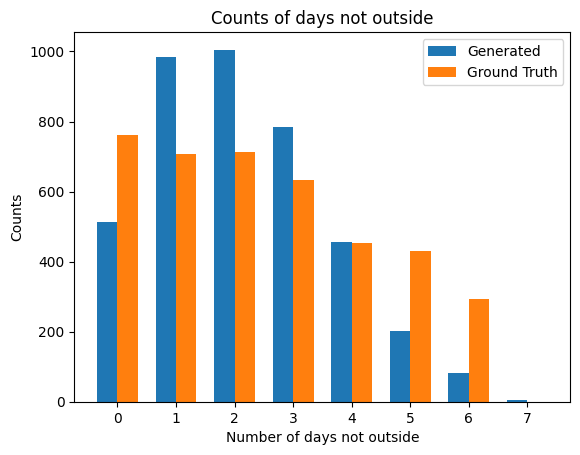

In [30]:
# これらをヒストグラムで比較
import matplotlib.pyplot as plt
import seaborn as sns

data1 = list(not_outside_res_dict.values())
data2 = list(not_outside_teacher_dict.values())
labels = list(not_outside_res_dict.keys())
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, data1, width, label='Generated')
rects2 = ax.bar(x + width/2, data2, width, label='Ground Truth')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_xlabel('Number of days not outside')
ax.set_title('Counts of days not outside')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
# ax.set_ylim(0,)/Users/matsunagatakahiro/Desktop/res2025/ActFormer/RoutesFormer/actformer0411/generated_res_visu/not_goout_day.png
plt.savefig(f'/Users/matsunagatakahiro/Desktop/res2025/ActFormer/RoutesFormer/actformer0411/generated_res_visu/0506act_nogoout_{init_len}.png', dpi=300)
plt.show()


In [31]:
# 一人の1週間のトリップ発生回数のカウント
# not_count_tokens = [5, 13, 14, 15, 16] # これらは特殊トークンなので．
def count_trips(row):
    count = 0
    for i in range(len(row)):
        if row[i] <= 4: # 4以下の時のみトークンが意味を持つ not in not_count_tokens: # != int(5) and row[i] != int(13):
            count += 1
    return count

ntrip_res_dict = {}
ntrip_res_dict = {k: 0 for k in range(50)}

df_act_res_core = df_act_res.iloc[:, 1:]

for i in range(len(df_act_res_core)):
    row = df_act_res_core.iloc[i]
    count = count_trips(row)
    if count < 50:
        ntrip_res_dict[count] += 1
    if count >= 50:
        ntrip_res_dict[49] += 1
print(ntrip_res_dict)

/var/folders/_k/qgnv6b3961q5nz5l1v78bw080000gn/T/ipykernel_21531/1167882501.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[i] <= 4: # 4以下の時のみトークンが意味を持つ not in not_count_tokens: # != int(5) and row[i] != int(13):


{0: 1, 1: 0, 2: 72, 3: 27, 4: 145, 5: 145, 6: 251, 7: 213, 8: 355, 9: 317, 10: 352, 11: 373, 12: 382, 13: 315, 14: 303, 15: 252, 16: 181, 17: 125, 18: 72, 19: 40, 20: 23, 21: 19, 22: 8, 23: 9, 24: 2, 25: 4, 26: 2, 27: 1, 28: 0, 29: 0, 30: 0, 31: 1, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 1, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 41}


In [32]:
ntrip_teacher_dict = {}
ntrip_teacher_dict = {k: 0 for k in range(50)}
df_act_teacher_core = df_act_teacher.iloc[:, 1:]
for i in range(len(df_act_teacher_core)):
    row = df_act_teacher_core.iloc[i]
    count = count_trips(row)
    if count < 50:
        ntrip_teacher_dict[count] += 1
    if count >= 50:
        ntrip_teacher_dict[49] += 1
print(ntrip_teacher_dict)

/var/folders/_k/qgnv6b3961q5nz5l1v78bw080000gn/T/ipykernel_21531/1167882501.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[i] <= 4: # 4以下の時のみトークンが意味を持つ not in not_count_tokens: # != int(5) and row[i] != int(13):


{0: 0, 1: 0, 2: 213, 3: 55, 4: 237, 5: 97, 6: 226, 7: 117, 8: 254, 9: 167, 10: 303, 11: 201, 12: 260, 13: 200, 14: 246, 15: 207, 16: 205, 17: 184, 18: 155, 19: 117, 20: 88, 21: 68, 22: 58, 23: 50, 24: 45, 25: 32, 26: 29, 27: 29, 28: 19, 29: 17, 30: 17, 31: 18, 32: 15, 33: 5, 34: 10, 35: 7, 36: 4, 37: 1, 38: 2, 39: 2, 40: 1, 41: 2, 42: 3, 43: 3, 44: 3, 45: 2, 46: 1, 47: 1, 48: 3, 49: 13}


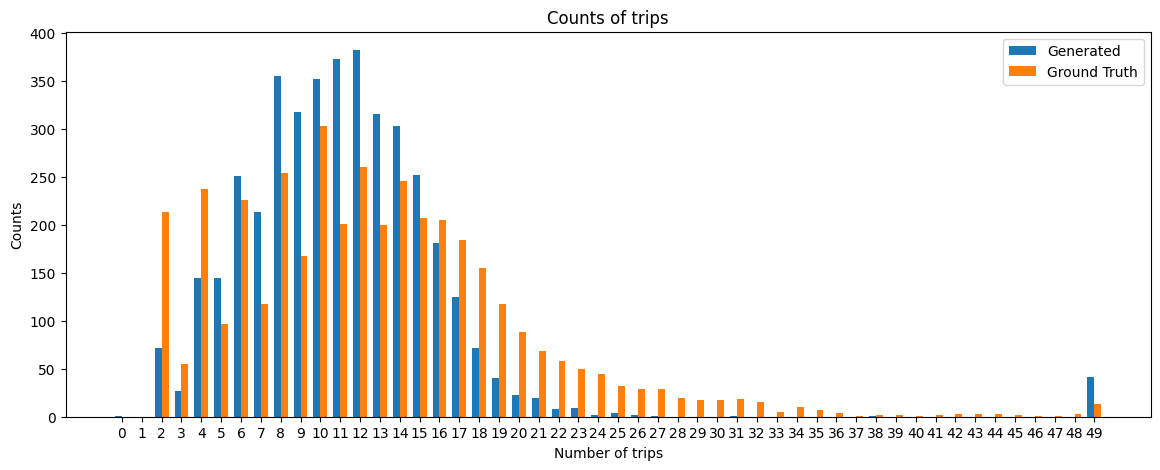

In [33]:
# graph
data1 = list(ntrip_res_dict.values())
data2 = list(ntrip_teacher_dict.values())
labels = list(ntrip_res_dict.keys())
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(14, 5))
rects1 = ax.bar(x - width/2, data1, width, label='Generated')
rects2 = ax.bar(x + width/2, data2, width, label='Ground Truth')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_xlabel('Number of trips')
ax.set_title('Counts of trips')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig(f'/Users/matsunagatakahiro/Desktop/res2025/ActFormer/RoutesFormer/actformer0411/generated_res_visu/0506act_tripcounts_{init_len}.png', dpi=300)

plt.show()

In [34]:
# # 1日の活動パタン分布
# from collections import Counter

# def count_act_pattern(row):
#     count = 0
#     for i in range(len(row)):
#         if row[]

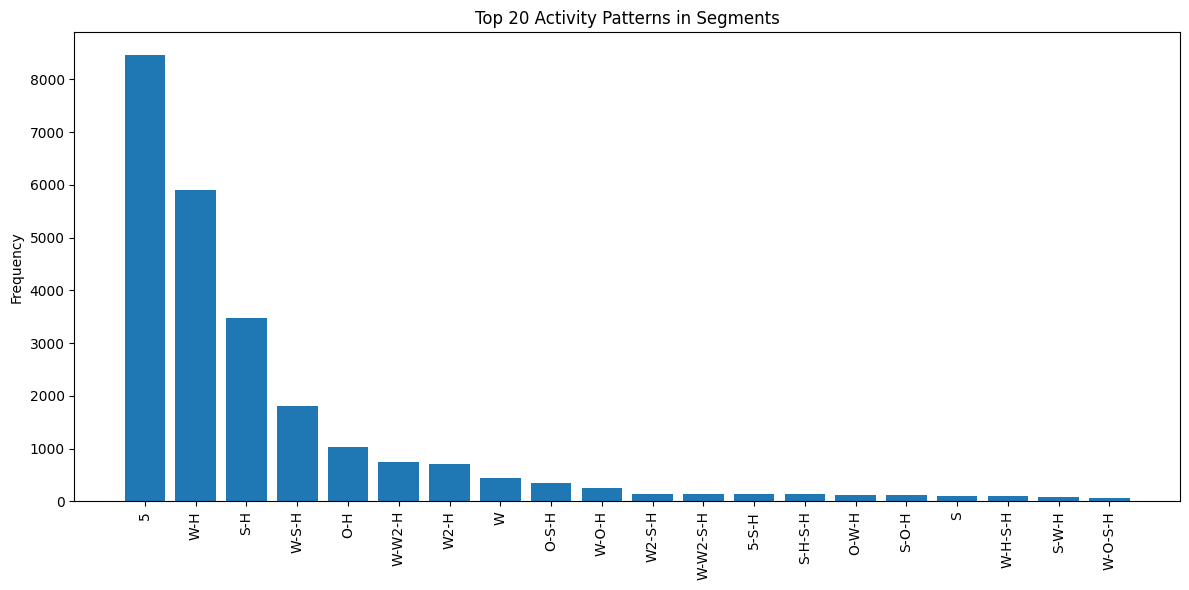

In [35]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# 時刻トークン（区切り記号）
time2id = {'<s>': 26, '<s1>': 27, '<s2>': 28, '<s3>': 29, '<s4>': 30, '<s5>': 31, '<s6>': 32} #, '<s7>': 33, '<s8>': 34, '<s9>': 35, 'nan': 36} # nanは<955>に変換
act2id = {'955': 6, '<s>': 7, '<s1>': 8, '<s2>': 9, '<s3>': 10, '<s4>': 11, '<s5>': 12, '<s6>': 13}  # 955はnanの代わりに入れている

id2word = {0: 'H',
           1: 'S',
           2: 'W',
           3: 'W2',
           4: 'O'
           }

sep_tokens = set(act2id.values())

# row: list[int] の列があると仮定（例：df['tokens']）
def extract_segments(row):
    segments = []
    current = []
    for token in row:
        if token in sep_tokens:
            if current:
                segments.append(tuple(current))  # パターンとしてタプルに
                current = []
        else:
            current.append(token)
    if current:
        segments.append(tuple(current))  # 最後の文節
    return segments

# 全体のパターンカウント
pattern_counter = Counter()

for i in range(len(df_act_res)):
# for row in df['tokens']:  # 各行は list[int] でトークン列を想定
    row = df_act_res.iloc[i, 2:]
    segments = extract_segments(row)
    pattern_counter.update(segments)

# 上位パターンを可視化
most_common = pattern_counter.most_common(20)
patterns, counts = zip(*most_common)

# ラベルをid2wordで変換：例 (0,2) → 'H-W'
def pattern_to_str(pattern):
    return '-'.join(id2word.get(i, str(i)) for i in pattern)

pattern_labels = [pattern_to_str(p) for p in patterns]

# print('pattern', patterns)

# for pa

# import sys
# sys.exit()

plt.figure(figsize=(12, 6))
plt.bar(range(len(counts)), counts)
# plt.xticks(range(len(patterns)), [str(p) for p in patterns], rotation=90)
plt.xticks(range(len(patterns)), pattern_labels, rotation=90)
plt.ylabel("Frequency")
plt.title("Top 20 Activity Patterns in Segments")
plt.tight_layout()
plt.savefig(f'/Users/matsunagatakahiro/Desktop/res2025/ActFormer/RoutesFormer/actformer0411/generated_res_visu/0506act_pattern_{init_len}.png', dpi=300)
plt.show()


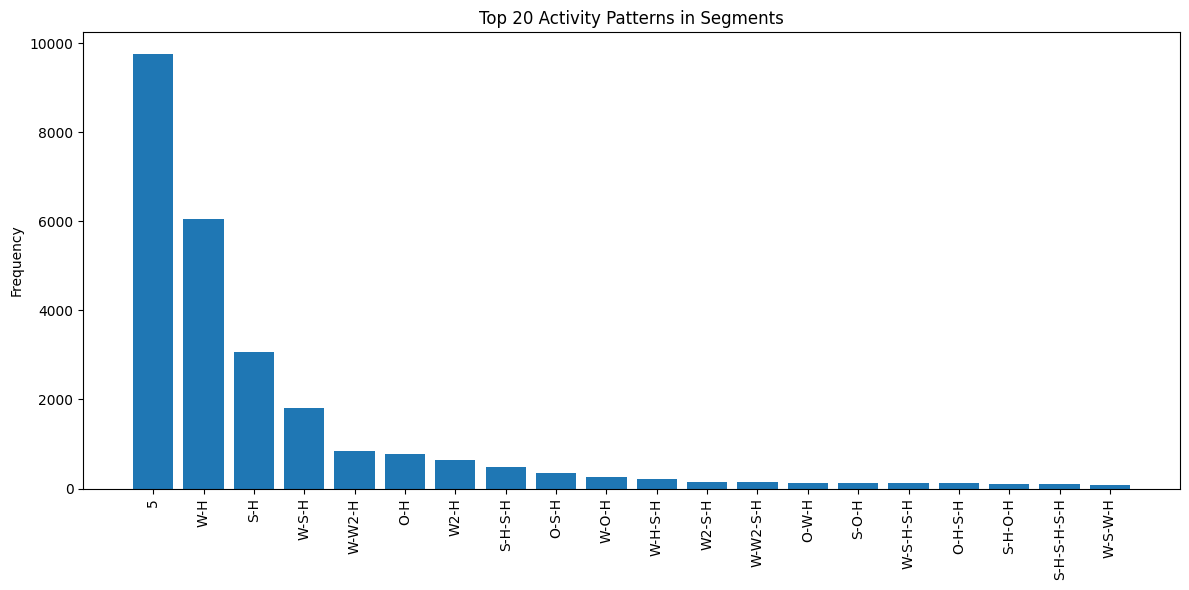

In [36]:

# 全体のパターンカウント
pattern_counter = Counter()

id2word = {0: 'H',
           1: 'S',
           2: 'W',
           3: 'W2',
           4: 'O'
           }

for i in range(len(df_act_teacher)):
# for row in df['tokens']:  # 各行は list[int] でトークン列を想定
    row = df_act_teacher.iloc[i, 1:]
    segments = extract_segments(row)
    pattern_counter.update(segments)

# 上位パターンを可視化
most_common = pattern_counter.most_common(20)
patterns, counts = zip(*most_common)
# ラベルをid2wordで変換：例 (0,2) → 'H-W'
def pattern_to_str(pattern):
    return '-'.join(id2word.get(i, str(i)) for i in pattern)

pattern_labels = [pattern_to_str(p) for p in patterns]

plt.figure(figsize=(12, 6))
plt.bar(range(len(counts)), counts)
# plt.xticks(range(len(patterns)), [str(p) for p in patterns], rotation=90)
plt.xticks(range(len(patterns)), pattern_labels, rotation=90)
plt.ylabel("Frequency")
plt.title("Top 20 Activity Patterns in Segments")
plt.tight_layout()
plt.savefig(f'/Users/matsunagatakahiro/Desktop/res2025/ActFormer/RoutesFormer/actformer0411/generated_res_visu/0506act_teacher_pattern_{init_len}.png', dpi=300)
plt.show()


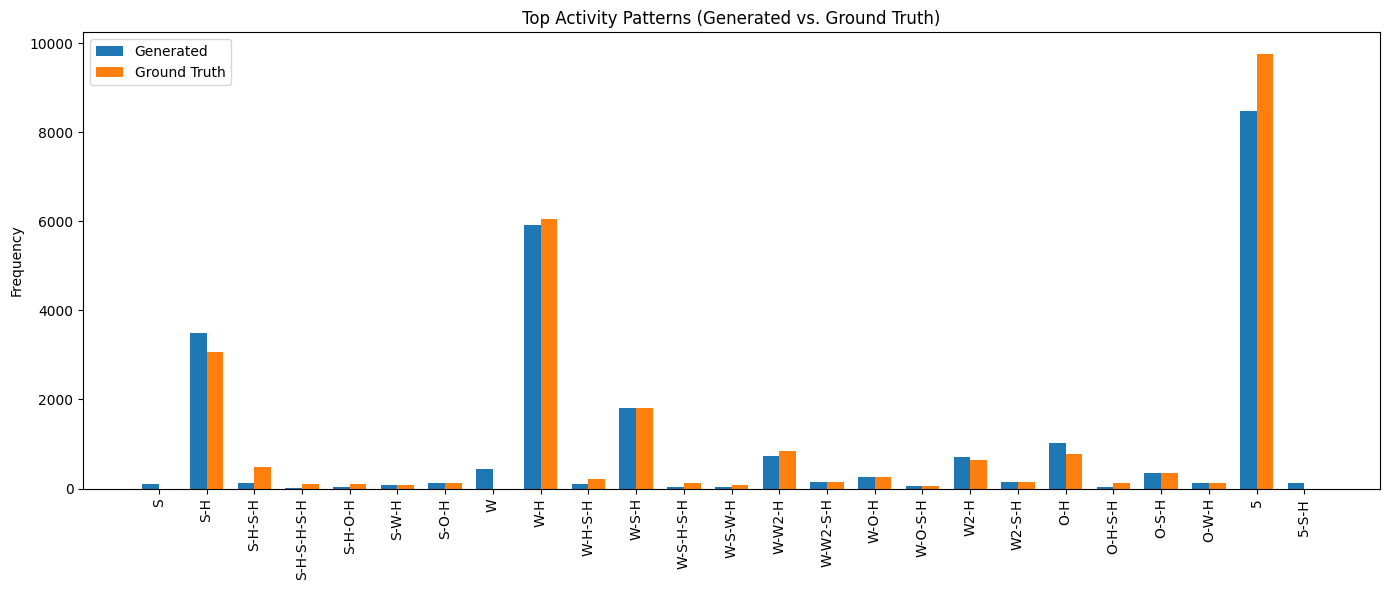

In [37]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# 区切り記号トークン
sep_tokens = set(act2id.values())

# 文節抽出関数
def extract_segments(row):
    segments = []
    current = []
    for token in row:
        if token in sep_tokens:
            if current:
                segments.append(tuple(current))
                current = []
        else:
            current.append(token)
    if current:
        segments.append(tuple(current))
    return segments

# id2word マッピング
id2word = {0: 'H', 1: 'S', 2: 'W', 3: 'W2', 4: 'O'}

def pattern_to_str(pattern):
    return '-'.join(id2word.get(i, str(i)) for i in pattern)

# --- データ1: 生成結果 ---
pattern_counter_res = Counter()
for i in range(len(df_act_res)):
    row = df_act_res.iloc[i, 2:]
    segments = extract_segments(row)
    pattern_counter_res.update(segments)

# --- データ2: 教師データ ---
pattern_counter_teacher = Counter()
for i in range(len(df_act_teacher)):
    row = df_act_teacher.iloc[i, 1:]
    segments = extract_segments(row)
    pattern_counter_teacher.update(segments)

# --- 上位パターン（両方のtop20を合わせてuniqueに） ---
top_patterns = set([p for p, _ in pattern_counter_res.most_common(20)] + 
                   [p for p, _ in pattern_counter_teacher.most_common(20)])
top_patterns = sorted(top_patterns)  # 一貫した順序

# --- 可視化データの整形 ---
labels = [pattern_to_str(p) for p in top_patterns]
data_res = [pattern_counter_res.get(p, 0) for p in top_patterns]
data_teacher = [pattern_counter_teacher.get(p, 0) for p in top_patterns]

x = np.arange(len(labels))
width = 0.35

# --- プロット ---
plt.figure(figsize=(14, 6))
plt.bar(x - width/2, data_res, width, label='Generated')
plt.bar(x + width/2, data_teacher, width, label='Ground Truth')
plt.xticks(x, labels, rotation=90)
plt.ylabel("Frequency")
plt.title("Top Activity Patterns (Generated vs. Ground Truth)")
plt.legend()
plt.tight_layout()
plt.savefig(f'/Users/matsunagatakahiro/Desktop/res2025/ActFormer/RoutesFormer/actformer0411/generated_res_visu/0506act_pattern_comparison_{init_len}.png', dpi=300)
plt.show()


In [38]:
pip install python-Levenshtein nltk



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [39]:
import Levenshtein
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# 例：トークン列（整数や文字列でOK）
generated = [0, 2, 4, 1]
reference = [0, 2, 3, 1]

# ✅ レーベンシュタイン距離（編集距離）
lev_distance = Levenshtein.distance(' '.join(map(str, generated)), ' '.join(map(str, reference)))
print(f"Levenshtein Distance: {lev_distance}")

# ✅ BLEUスコア（n-gram類似度） ※1文ペアに対して
smoothie = SmoothingFunction().method4
bleu_score = sentence_bleu([reference], generated, smoothing_function=smoothie)
print(f"BLEU Score: {bleu_score:.4f}")


Levenshtein Distance: 1
BLEU Score: 0.1862
